In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from datetime import datetime 

In [154]:
data = pd.read_csv('data/00-crash_reporting_incidents.csv', low_memory = False)

In [155]:
data.shape

(47592, 44)

In [156]:
data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3119001T,190047416,Montgomery County Police,Property Damage Crash,10/03/2019 11:30:00 AM,No,County,0.94,North,North,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.172548,-77.203174,"(39.17254783, -77.203174)"
1,MCP9428002D,190047394,Montgomery County Police,Property Damage Crash,10/03/2019 09:50:00 AM,No,County,1.92,North,South,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.253445,-77.275482,"(39.253445, -77.27548167)"
2,MCP27260043,190047395,Montgomery County Police,Property Damage Crash,10/03/2019 09:28:00 AM,Yes,County,0.78,East,West,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.053780,-77.099195,"(39.05378023, -77.0991953)"
3,MCP91300088,190047384,Montgomery County Police,Property Damage Crash,10/03/2019 09:03:00 AM,Yes,US (State),2.72,North,South,...,CURB,NON INTERSECTION,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.019415,-77.013685,"(39.019415, -77.013685)"
4,MCP1119007N,190047378,Montgomery County Police,Property Damage Crash,10/03/2019 08:06:00 AM,No,Maryland (State),4.81,North,South,...,NaN,INTERSECTION RELATED,FOUR-WAY INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.059683,-77.051695,"(39.05968333, -77.051695)"


In [157]:
data['Crash Date/Time'].min(), data['Crash Date/Time'].max() 

('01/01/2016 01:22:00 PM', '12/31/2018 12:58:00 PM')

In [158]:
data['date'] = pd.to_datetime(data['Crash Date/Time']).dt.date

In [159]:
data['Crash Date/Time'] = pd.to_datetime(data['Crash Date/Time']).dt.normalize()

In [160]:
data['Crash Date/Time'].min(), data['Crash Date/Time'].max() 

(Timestamp('2015-10-05 00:00:00'), Timestamp('2019-10-03 00:00:00'))

In [161]:
data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point',
       'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Lane Type',
       'Number of Lanes', 'Direction', 'Distance', 'Distance Unit',
       'Road Grade', 'NonTraffic', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Location',
       'date'],
      dtype='object')

In [162]:
cols = ['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Hit/Run', 'Route Type', 'Mile Point',
       'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Lane Type',
       'Number of Lanes', 'Direction', 'Distance', 'Distance Unit',
       'Road Grade', 'NonTraffic', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Location']

In [163]:
data.drop(cols, axis = 1, inplace = True)

In [164]:
data.head()

,Crash Date/Time,date
0,2019-10-03,2019-10-03
1,2019-10-03,2019-10-03
2,2019-10-03,2019-10-03
3,2019-10-03,2019-10-03
4,2019-10-03,2019-10-03


In [165]:
data.columns

Index(['Crash Date/Time', 'date'], dtype='object')

In [166]:
data['date'] = pd.to_datetime(data['date']).dt.normalize()

In [167]:
data.head()

,Crash Date/Time,date
0,2019-10-03,2019-10-03
1,2019-10-03,2019-10-03
2,2019-10-03,2019-10-03
3,2019-10-03,2019-10-03
4,2019-10-03,2019-10-03


In [168]:
data['day'] = ""
data['month'] = ""
data['year'] = ""

In [169]:
data.head()

,Crash Date/Time,date,day,month,year
0,2019-10-03,2019-10-03,,,
1,2019-10-03,2019-10-03,,,
2,2019-10-03,2019-10-03,,,
3,2019-10-03,2019-10-03,,,
4,2019-10-03,2019-10-03,,,


In [170]:
from datetime import datetime

In [171]:
data['day'] = pd.DatetimeIndex(data['date']).day
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year

In [172]:
data['year_month'] = ''

In [173]:
data['year_month'] = data['date'].dt.strftime('%Y-%m')

In [174]:
data.head()

,Crash Date/Time,date,day,month,year,year_month
0,2019-10-03,2019-10-03,3,10,2019,2019-10
1,2019-10-03,2019-10-03,3,10,2019,2019-10
2,2019-10-03,2019-10-03,3,10,2019,2019-10
3,2019-10-03,2019-10-03,3,10,2019,2019-10
4,2019-10-03,2019-10-03,3,10,2019,2019-10


In [175]:
data.head()

,Crash Date/Time,date,day,month,year,year_month
0,2019-10-03,2019-10-03,3,10,2019,2019-10
1,2019-10-03,2019-10-03,3,10,2019,2019-10
2,2019-10-03,2019-10-03,3,10,2019,2019-10
3,2019-10-03,2019-10-03,3,10,2019,2019-10
4,2019-10-03,2019-10-03,3,10,2019,2019-10


In [176]:
data = data.set_index("date").groupby(pd.Grouper(freq='M')).count()

In [177]:
data.head()

,Crash Date/Time,day,month,year,year_month
date,,,,,
2015-10-31,947,947,947,947,947
2015-11-30,1061,1061,1061,1061,1061
2015-12-31,1108,1108,1108,1108,1108
2016-01-31,999,999,999,999,999
2016-02-29,827,827,827,827,827


In [178]:
data = data['day'].to_frame()

In [179]:
data.head()

,day
date,
2015-10-31,947
2015-11-30,1061
2015-12-31,1108
2016-01-31,999
2016-02-29,827


In [180]:
data = data.rename(columns = {'day':'crashes'})

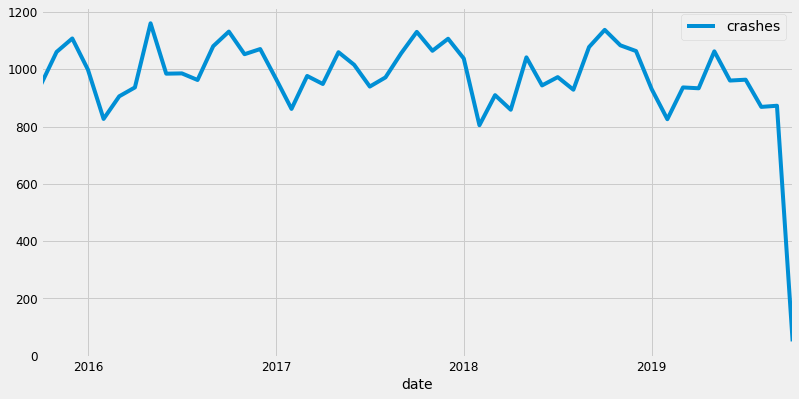

In [181]:
data.plot(figsize = (12, 6))

In [182]:
data

,crashes
date,
2015-10-31,947
2015-11-30,1061
2015-12-31,1108
2016-01-31,999
2016-02-29,827
2016-03-31,906
2016-04-30,937
2016-05-31,1161
2016-06-30,985


In [151]:
data = data[3:39]

Text(0, 0.5, 'Number of Crashes')

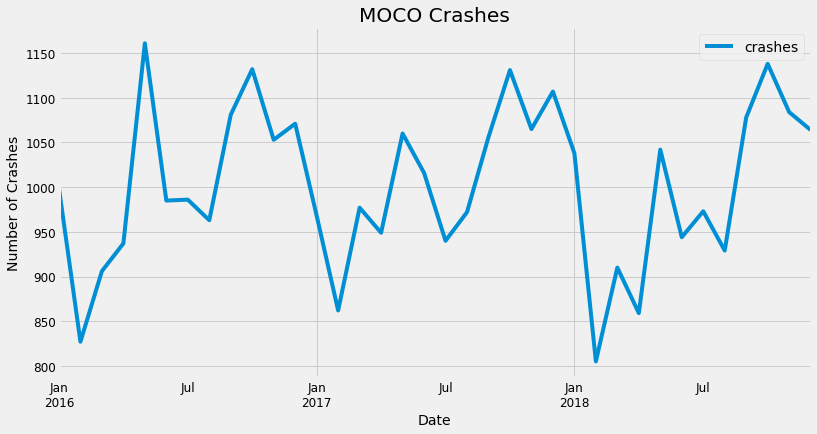

In [152]:
data.plot(figsize = (12, 6))
plt.title('MOCO Crashes')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')

In [110]:
# y = data['crashes'].resample('MS').mean()

In [111]:
y = data['crashes']

In [112]:
y['2017']

date
2017-01-31     968
2017-02-28     862
2017-03-31     977
2017-04-30     949
2017-05-31    1060
2017-06-30    1016
2017-07-31     940
2017-08-31     972
2017-09-30    1056
2017-10-31    1131
2017-11-30    1065
2017-12-31    1107
Freq: M, Name: crashes, dtype: int64

# Time Series Model 

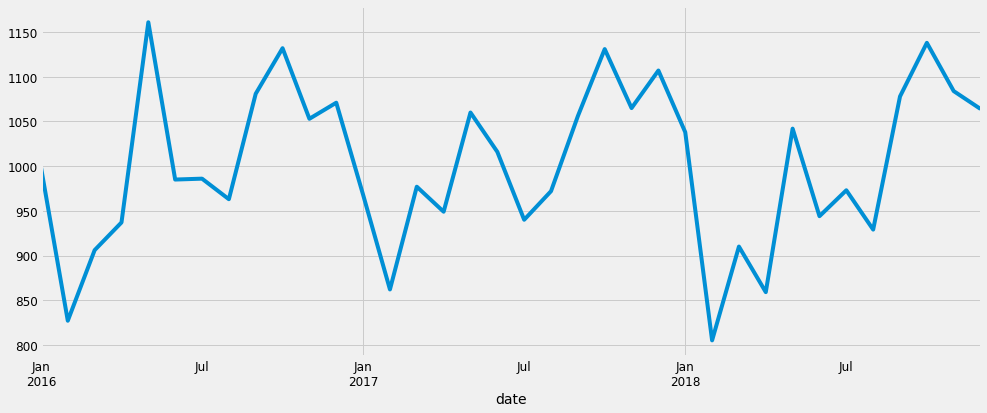

Text(0.5, 1.0, 'Time Series\nMOCO Crashes')

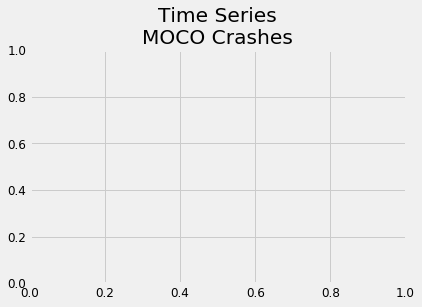

In [113]:
y.plot(figsize=(15, 6))
plt.show()
plt.title('Time Series\nMOCO Crashes')

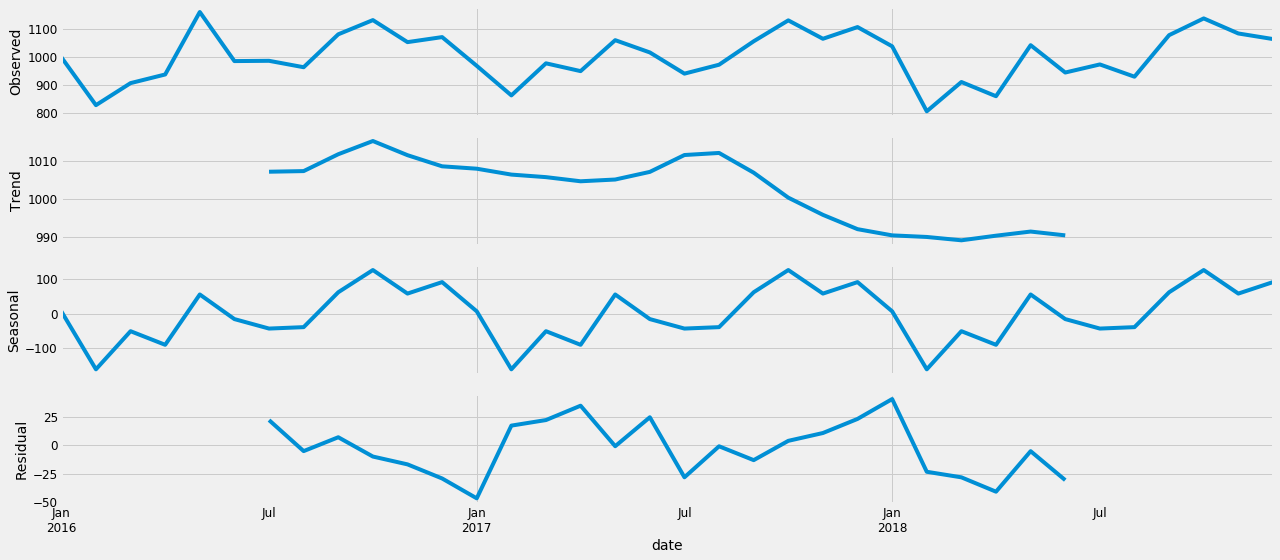

In [114]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [115]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [116]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8627      0.090     -9.538      0.000      -1.040      -0.685
ma.L1          0.7657      0.526      1.457      0.145      -0.265       1.796
ar.S.L12      -0.4349      0.294     -1.482      0.138      -1.010       0.140
sigma2       930.6584    855.162      1.088      0.276    -745.427    2606.744


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

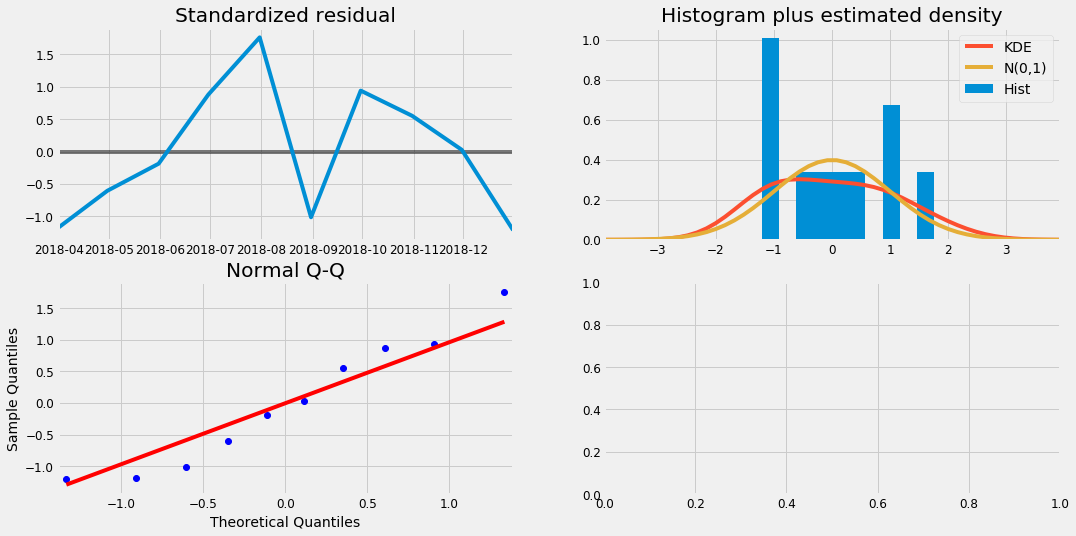

In [117]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

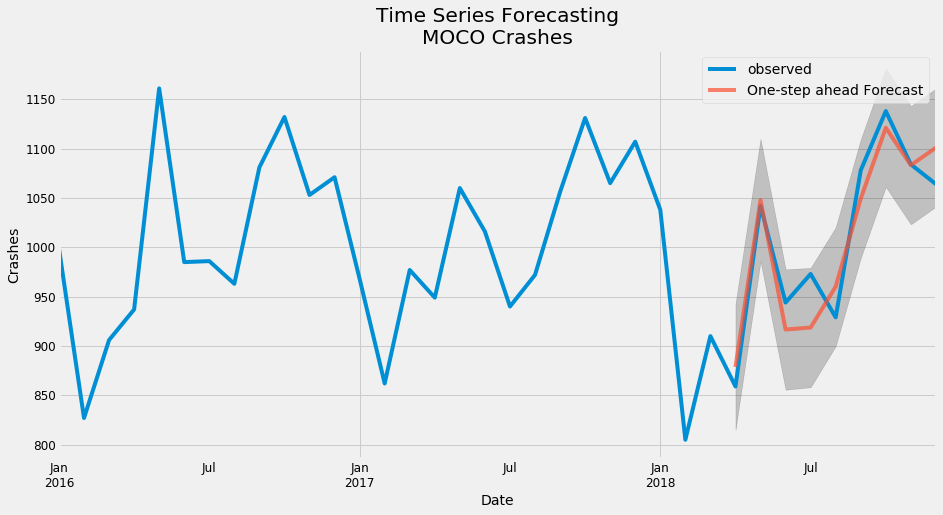

In [118]:
pred = results.get_prediction(start=27, dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crashes')
plt.title('Time Series Forecasting\nMOCO Crashes')
plt.legend()
plt.show()

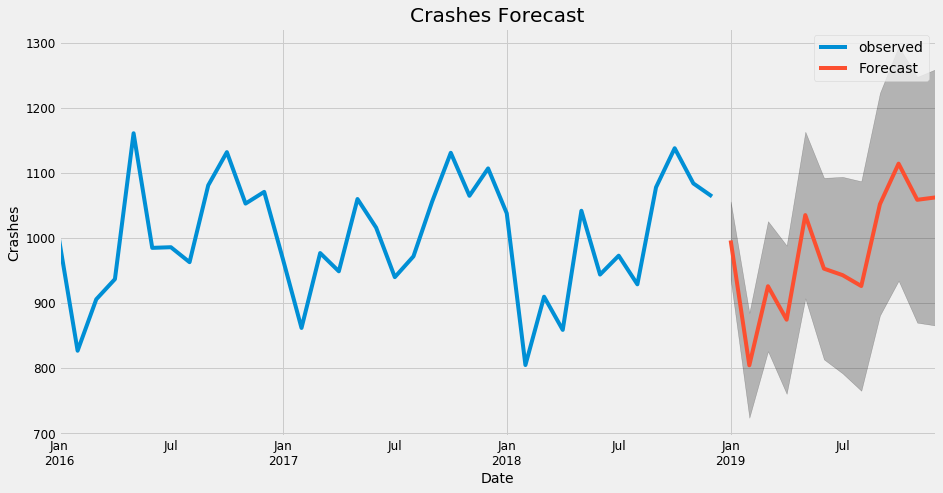

In [120]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crashes')
plt.title('Crashes Forecast')
plt.legend()
plt.show()

In [346]:
y

date
2016-01-31     999
2016-02-29     827
2016-03-31     906
2016-04-30     937
2016-05-31    1161
2016-06-30     985
2016-07-31     986
2016-08-31     963
2016-09-30    1081
2016-10-31    1132
2016-11-30    1053
2016-12-31    1071
2017-01-31     968
2017-02-28     862
2017-03-31     977
2017-04-30     949
2017-05-31    1060
2017-06-30    1016
2017-07-31     940
2017-08-31     972
2017-09-30    1056
2017-10-31    1131
2017-11-30    1065
2017-12-31    1107
2018-01-31    1038
2018-02-28     805
2018-03-31     910
2018-04-30     859
2018-05-31    1042
2018-06-30     944
2018-07-31     973
2018-08-31     929
2018-09-30    1078
2018-10-31    1138
2018-11-30    1084
2018-12-31    1064
Freq: M, Name: crashes, dtype: int64

In [340]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 840.67


In [341]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 28.99


# Time Series Normalized

In [342]:
from sklearn import preprocessing

In [343]:
data.head()

,crashes
date,
2016-01-31,999
2016-02-29,827
2016-03-31,906
2016-04-30,937
2016-05-31,1161


In [344]:
# Create x, where x the 'scores' column's values as floats
x = data[['crashes']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

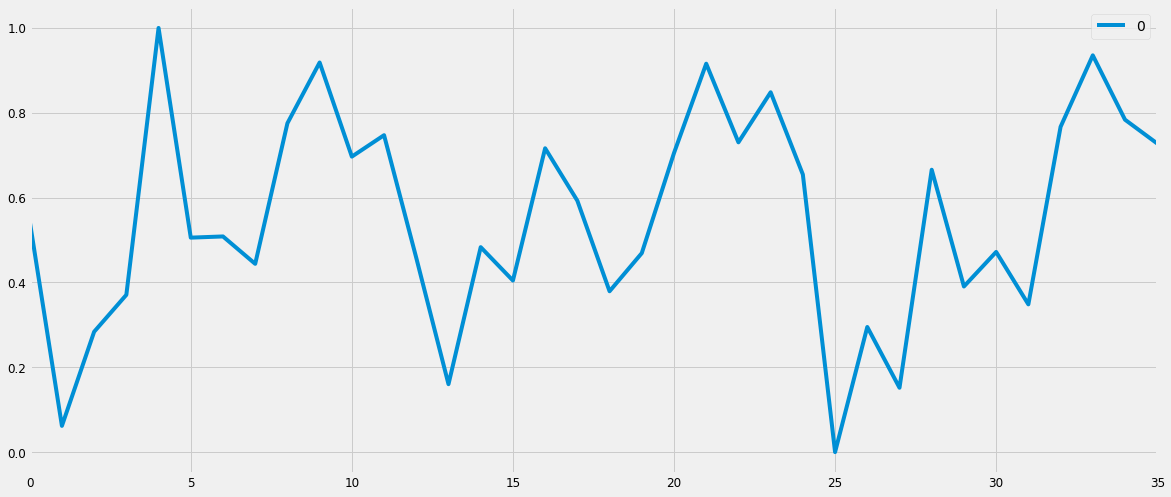

In [345]:
df_normalized.plot()

In [333]:
df_normalized.to_csv('data/crashes_normalized.csv')